# Importações de dados brutos

In [ ]:
import os
import joblib

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# from scipy import stats
from scipy.stats import mannwhitneyu, normaltest, ranksums
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install util-gfsilveira

In [ ]:
from util import *

In [ ]:
meus_uteis()

-------------
-=< Lista >=-
-------------
0 -> printLinha()
1 -> printLis()
2 -> printDic()
3 -> timeProcess()
4 -> import_started()
5 -> img_save()
6 -> setup_img_save()
7 -> mask_corr_graphic()
8 -> structured_confusion()


In [ ]:
os.chdir('dados')

In [ ]:
perguntas = joblib.load('perguntas.gz')
df = joblib.load('df_mysql.gz')
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


In [ ]:
# df.to_csv('dados_completos.csv')

In [ ]:
perguntas

{'Compreensão': '6) Classifique o quanto a imagem facilitou a compreensão do conteúdo da informação.',
 'Descrição': '8) Existem elementos da imagem que requerem descrição adicional?',
 'Dintinguíveis': '1) Na imagem, o quão claramente os elementos são distinguíveis?',
 'Eficiente': '3) O quão eficiente são os elementos da imagem na representação dos dados?',
 'Estética': '5) O quanto a imagem é esteticamente bem elaborada?',
 'Fonte': '9) A imagem apresentada faz você experimentar uma nova fonte de dados?',
 'Grau': 'Qual o seu grau de formação acadêmica?',
 'Interesse': '7) Classifique o quanto a imagem despertou o seu interesse pelo conteúdo.',
 'Proeminentes': '2) O quão visualmente proeminentes são os elementos da imagem?',
 'Área': 'Área de formação?',
 'Útil': '4) O quão útil é a aplicação de uma imagem esquemática – desenho científico ou graphic abstract para representar os dados?'}

# Geral

In [ ]:
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 1 to 472
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           472 non-null    datetime64[ns]
 1   IP             472 non-null    object        
 2   TCLE           472 non-null    object        
 3   Língua         472 non-null    object        
 4   Figura         472 non-null    object        
 5   Dintinguíveis  472 non-null    int32         
 6   Proeminentes   472 non-null    int32         
 7   Descrição      472 non-null    object        
 8   Eficiente      472 non-null    int32         
 9   Útil           472 non-null    int32         
 10  Estética       472 non-null    int32         
 11  Fonte          472 non-null    object        
 12  Compreensão    472 non-null    int32         
 13  Interesse      472 non-null    int32         
 14  Grau           472 non-null    object        
 15  Área           472 non-

In [ ]:
df.describe()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,3.786017,3.576271,3.552966,4.614407,3.567797,3.599576,3.489407
std,1.227245,1.274654,1.247227,0.909751,1.340082,1.314075,1.376129
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Tabelas de Frequência

In [ ]:
index=[n for n in range(1,6)]
index.append('Total')
columns=df.columns[col]
freq = pd.DataFrame(data=np.nan, index=index, columns=columns)
freq

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pesq = df.copy()
freq_ab_pesq = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] == 'Pesquisador']
for n, v in enumerate(col):
    dict_data = organize_values(df_pesq[df_pesq.columns[col[n]]])
    dict_data['Total'] = sum(dict_data.values())
    freq_ab_pesq[df_pesq.columns[col[n]]] = dict_data.values()
freq_ab_pesq.to_csv("figure/freq_ab_pesq.csv")
freq_ab_pesq

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,19,32,28,11,47,37,53
2,35,44,36,8,44,34,44
3,56,65,68,9,72,52,45
4,64,57,59,28,50,61,55
5,62,38,45,180,23,52,39
Total,236,236,236,236,236,236,236


In [ ]:
df_pesq = df.copy()
freq_ab_des = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] != 'Pesquisador']
for n, v in enumerate(col):
    dict_data = organize_values(df_pesq[df_pesq.columns[col[n]]])
    dict_data['Total'] = sum(dict_data.values())
    freq_ab_des[df_pesq.columns[col[n]]] = dict_data.values()
freq_ab_des.to_csv("figure/freq_ab_des.csv")
freq_ab_des

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,8,4,10,2,3,9,7
2,21,26,26,8,14,26,19
3,30,34,37,4,23,31,34
4,61,63,76,28,62,70,71
5,116,109,87,194,134,100,105
Total,236,236,236,236,236,236,236


In [ ]:
freq_rel_pesq = freq.copy()
for n in range(7):
    coluna = freq_ab_pesq.columns[n]
    freq_rel_pesq[coluna] = round(freq_ab_pesq[coluna]/freq_ab_pesq.loc['Total', coluna], 2)
freq_rel_pesq.to_csv("figure/freq_rel_pesq.csv")
freq_rel_pesq

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,0.08,0.14,0.12,0.05,0.20,0.16,0.22
2,0.15,0.19,0.15,0.03,0.19,0.14,0.19
3,0.24,0.28,0.29,0.04,0.31,0.22,0.19
4,0.27,0.24,0.25,0.12,0.21,0.26,0.23
5,0.26,0.16,0.19,0.76,0.10,0.22,0.17
Total,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
freq_rel_des = freq.copy()
for n in range(7):
    coluna = freq_ab_des.columns[n]
    freq_rel_des[coluna] = round(freq_ab_des[coluna]/freq_ab_des.loc['Total', coluna], 2)
freq_rel_des.to_csv("figure/freq_rel_des.csv")
freq_rel_des

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
1,0.03,0.02,0.04,0.01,0.01,0.04,0.03
2,0.09,0.11,0.11,0.03,0.06,0.11,0.08
3,0.13,0.14,0.16,0.02,0.10,0.13,0.14
4,0.26,0.27,0.32,0.12,0.26,0.30,0.30
5,0.49,0.46,0.37,0.82,0.57,0.42,0.44
Total,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
index=['Sim','Não']
index.append('Total')
columns=df.columns[[7,11]]
freq = pd.DataFrame(data=np.nan, index=index, columns=columns)
freq

,Descrição,Fonte
Sim,NaN,NaN
Não,NaN,NaN
Total,NaN,NaN


In [ ]:
coluna = [df.columns[7], df.columns[11]]
df_pesq = df.copy()
freq_ab_pesq = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] == 'Pesquisador'][coluna]
freq_ab_pesq.loc[['Sim','Não'],coluna[0]] = df_pesq[coluna[0]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[0]] = df_pesq[coluna[0]].value_counts().sum()
freq_ab_pesq.loc[['Sim','Não'],coluna[1]] = df_pesq[coluna[1]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[1]] = df_pesq[coluna[1]].value_counts().sum()
freq_ab_pesq.to_csv("figure/freq_ab_pesq_qnt.csv")

freq_rel_pesq = freq.copy()
freq_rel_pesq.iloc[:, 0] = round(freq_ab_pesq.iloc[:, 0]/freq_ab_pesq.iloc[-1, 0], 2)
freq_rel_pesq.iloc[:, 1] = round(freq_ab_pesq.iloc[:, 1]/freq_ab_pesq.iloc[-1, 1], 2)
freq_rel_pesq.to_csv("figure/freq_rel_pesq_qnt.csv")

freq_ab_pesq

,Descrição,Fonte
Sim,206.0,146.0
Não,30.0,90.0
Total,236.0,236.0


In [ ]:
freq_rel_pesq

,Descrição,Fonte
Sim,0.87,0.62
Não,0.13,0.38
Total,1.00,1.00


In [ ]:
df_pesq = df.copy()
freq_ab_pesq = freq.copy()
df_pesq = df_pesq[df_pesq.iloc[:, -1] != 'Pesquisador'][coluna]
freq_ab_pesq.loc[['Sim','Não'],coluna[0]] = df_pesq[coluna[0]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[0]] = df_pesq[coluna[0]].value_counts().sum()
freq_ab_pesq.loc[['Sim','Não'],coluna[1]] = df_pesq[coluna[1]].value_counts()
freq_ab_pesq.loc[['Total'],coluna[1]] = df_pesq[coluna[1]].value_counts().sum()
freq_ab_pesq.to_csv("figure/freq_ab_des_qnt.csv")

freq_rel_pesq = freq.copy()
freq_rel_pesq.iloc[:, 0] = round(freq_ab_pesq.iloc[:, 0]/freq_ab_pesq.iloc[-1, 0], 2)
freq_rel_pesq.iloc[:, 1] = round(freq_ab_pesq.iloc[:, 1]/freq_ab_pesq.iloc[-1, 1], 2)
freq_rel_pesq.to_csv("figure/freq_rel_des_qnt.csv")

freq_ab_pesq

,Descrição,Fonte
Sim,168.0,191.0
Não,68.0,45.0
Total,236.0,236.0


In [ ]:
freq_rel_pesq

,Descrição,Fonte
Sim,0.71,0.81
Não,0.29,0.19
Total,1.00,1.00


# Estruturação dos dados, de acordo com as perguntas e origens das imagens.

In [ ]:
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


In [ ]:
# df.groupby(['Figura','Origem']).count().to_csv('n_de_participações.csv')
df.groupby(['Figura','Origem']).count()

Data  IP  TCLE  ...  Interesse  Grau  Área
Figura           Origem                       ...                       
Citocinas        Designer       39  39    39  ...         39    39    39
                 Pesquisador    39  39    39  ...         39    39    39
Células Tronco   Designer       40  40    40  ...         40    40    40
                 Pesquisador    40  40    40  ...         40    40    40
Febre Amarela    Designer       39  39    39  ...         39    39    39
                 Pesquisador    39  39    39  ...         39    39    39
Linfócitos       Designer       39  39    39  ...         39    39    39
                 Pesquisador    39  39    39  ...         39    39    39
Reovírus Aviário Designer       40  40    40  ...         40    40    40
                 Pesquisador    40  40    40  ...         40    40    40
T. gondii        Designer       39  39    39  ...         39    39    39
                 Pesquisador    39  39    39  ...         39    39    39

[12 rows x 15 columns]

In [ ]:
colunas_perguntas = df.columns[[5,6,8,9,10,12,13,16]]
df_perguntas = df[colunas_perguntas].copy()
df_perguntas.head()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse,Origem
id,,,,,,,,
1,2,1,1,5,2,1,1,Pesquisador
2,3,3,2,2,4,4,2,Designer
3,4,3,3,5,4,3,3,Pesquisador
4,4,4,5,5,5,5,5,Designer
5,5,1,5,5,2,5,4,Pesquisador


# Estrutrando o dado com **todas** as observações, por Origem. Teste de Willcoxon baseado em ranquiamento (rank-sum)

In [ ]:
array_pesquisador = np.array(df_perguntas.query("Origem == 'Pesquisador'"))[:,:-1].reshape(-1,)
array_designer = np.array(df_perguntas.query("Origem != 'Pesquisador'"))[:,:-1].reshape(-1,)
array_designer.mean()

4.147094430992736

In [ ]:
array_pesquisador.mean()

3.3347457627118646

In [ ]:
df_total = pd.DataFrame(data=[array_designer,array_pesquisador]).T
df_total.columns = ['Designer','Pesquisador']
df_total.describe()

,Designer,Pesquisador
count,1652.000000,1652.000000
mean,4.147094,3.334746
std,1.086578,1.369806
min,1.000000,1.000000
25%,4.000000,2.000000
50%,5.000000,3.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [ ]:
g = 1
campo = False

Not save


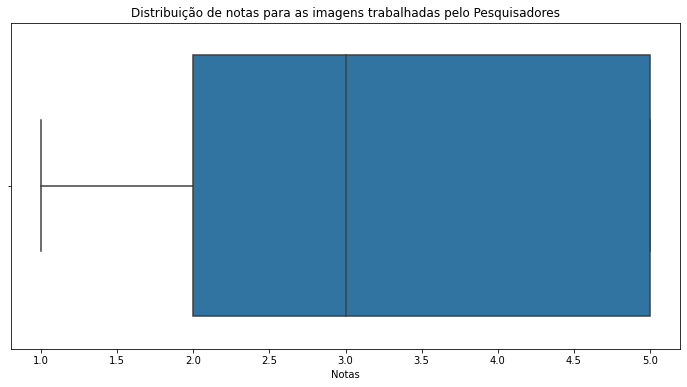

In [ ]:
ax = sns.boxplot(x=df_total.Pesquisador)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Notas")
ax.set_title("Distribuição de notas para as imagens trabalhadas pelo Pesquisadores")
img_save(campo=campo, g=str(g)+'_NotasPesquisador', date=timeProcess()[1])
plt.show(ax)

Not save


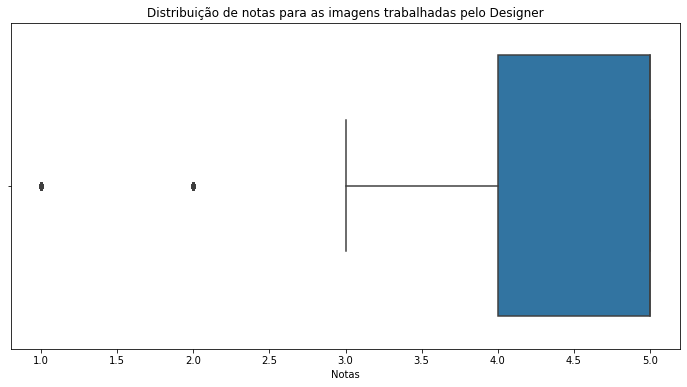

In [ ]:
g += 1
ax = sns.boxplot(x=df_total.Designer)
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Notas")
ax.set_title("Distribuição de notas para as imagens trabalhadas pelo Designer")
img_save(campo=campo, g=str(g)+'_NotasDesigner', date=timeProcess()[1])
plt.show(ax)

In [ ]:
from scipy.stats import normaltest, ranksums
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
_, p = ranksums(df_total.Pesquisador, df_total.Designer)
p

1.8778837722593852e-65

In [ ]:
pesq = {
    'Media': round(df_total.Pesquisador.mean(), 3),
    "IC (95%) super": zconfint(df_total.Pesquisador)[0].round(3),
    "IC (95%) infer": zconfint(df_total.Pesquisador)[1].round(3),
    "p-value": p
}
pesq

{'IC (95%) infer': 3.401,
 'IC (95%) super': 3.269,
 'Media': 3.335,
 'p-value': 1.8778837722593852e-65}

In [ ]:
des = {
    'Media': round(df_total.Designer.mean(), 3),
    "IC (95%) super": zconfint(df_total.Designer)[0].round(3),
    "IC (95%) infer": zconfint(df_total.Designer)[1].round(3),
    "p-value": p
}
des

{'IC (95%) infer': 4.199,
 'IC (95%) super': 4.095,
 'Media': 4.147,
 'p-value': 1.8778837722593852e-65}

In [ ]:
df_statistica_total = pd.DataFrame(data=[pesq,des], index=['Pesquisador','Designer'])
df_statistica_total.iloc[0,-1] = np.nan
# df_statistica_total.to_csv('figure/df_statistica_total.csv')
df_statistica_total

,Media,IC (95%) super,IC (95%) infer,p-value
Pesquisador,3.335,3.269,3.401,NaN
Designer,4.147,4.095,4.199,1.877884e-65


# Estrutrando o dado **por pergunta** as observações, por Origem

In [ ]:
df_perguntas.groupby('Origem').mean()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
Origem,,,,,,,
Designer,4.084746,4.046610,3.864407,4.711864,4.313559,3.957627,4.050847
Pesquisador,3.487288,3.105932,3.241525,4.516949,2.822034,3.241525,2.927966


In [ ]:
df_statistica_perguntas = np.array(df_perguntas.groupby('Origem').mean())
df_statistica_perguntas

array([[4.08474576, 4.04661017, 3.86440678, 4.71186441, 4.31355932,
        3.95762712, 4.05084746],
       [3.48728814, 3.1059322 , 3.24152542, 4.51694915, 2.8220339 ,
        3.24152542, 2.9279661 ]])

In [ ]:
lista_p_value_perguntas = [ranksums(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i], df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i])[1] for i in range(len(colunas_perguntas)-1)]
lista_p_value_perguntas

[9.850865681131528e-08,
 3.955539592933044e-15,
 7.700974073667129e-08,
 0.20522235993296356,
 2.0311932874351267e-33,
 1.0680428395514092e-08,
 1.914831439973601e-17]

In [ ]:
df_statistica_perguntas = np.append(df_statistica_perguntas, lista_p_value_perguntas).reshape(3,7)
df_statistica_perguntas

array([[4.08474576e+00, 4.04661017e+00, 3.86440678e+00, 4.71186441e+00,
        4.31355932e+00, 3.95762712e+00, 4.05084746e+00],
       [3.48728814e+00, 3.10593220e+00, 3.24152542e+00, 4.51694915e+00,
        2.82203390e+00, 3.24152542e+00, 2.92796610e+00],
       [9.85086568e-08, 3.95553959e-15, 7.70097407e-08, 2.05222360e-01,
        2.03119329e-33, 1.06804284e-08, 1.91483144e-17]])

In [ ]:
lista_intervalo_perguntas_designer = [zconfint(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
lista_intervalo_perguntas_designer

[(3.940521110203359, 4.2289704152203695),
 (3.9067295287063537, 4.1864908102766965),
 (3.7170098518971373, 4.011803707424896),
 (4.617555624864619, 4.806173188694703),
 (4.191017480637766, 4.43610116343003),
 (3.809780863514001, 4.105473373774134),
 (3.912234629039192, 4.189460286215045)]

In [ ]:
lista_intervalo_perguntas_pesquisador = [zconfint(df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
lista_intervalo_perguntas_pesquisador

[(3.327858657200211, 3.646717613986229),
 (2.9440474305027755, 3.2678169762768854),
 (3.080739433082298, 3.4023114143753292),
 (4.3835455895432975, 4.650352715541448),
 (2.662699255667009, 2.9813685409431607),
 (3.0674992185632393, 3.415551628894388),
 (2.7483495133089955, 3.107582690080835)]

In [ ]:
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,0]).reshape(4,7)
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,1]).reshape(5,7)
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,0]).reshape(6,7)
df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,1]).reshape(7,7)
df_statistica_perguntas

array([[4.08474576e+00, 4.04661017e+00, 3.86440678e+00, 4.71186441e+00,
        4.31355932e+00, 3.95762712e+00, 4.05084746e+00],
       [3.48728814e+00, 3.10593220e+00, 3.24152542e+00, 4.51694915e+00,
        2.82203390e+00, 3.24152542e+00, 2.92796610e+00],
       [9.85086568e-08, 3.95553959e-15, 7.70097407e-08, 2.05222360e-01,
        2.03119329e-33, 1.06804284e-08, 1.91483144e-17],
       [3.94052111e+00, 3.90672953e+00, 3.71700985e+00, 4.61755562e+00,
        4.19101748e+00, 3.80978086e+00, 3.91223463e+00],
       [4.22897042e+00, 4.18649081e+00, 4.01180371e+00, 4.80617319e+00,
        4.43610116e+00, 4.10547337e+00, 4.18946029e+00],
       [3.32785866e+00, 2.94404743e+00, 3.08073943e+00, 4.38354559e+00,
        2.66269926e+00, 3.06749922e+00, 2.74834951e+00],
       [3.64671761e+00, 3.26781698e+00, 3.40231141e+00, 4.65035272e+00,
        2.98136854e+00, 3.41555163e+00, 3.10758269e+00]])

In [ ]:
index = [
           'Designer Média',
           'Pesquisador Média',
           'p-value',
           'Designer IC infer (95%)',
           'Designer IC super (95%)',
           'Pesquisador IC infer (95%)',
           'Pesquisador IC super (95%)',
]
valores = [
           'Média',
           'Média',
           'p-value',
           'IC infer (95%)',
           'IC super (95%)',
           'IC infer (95%)',
           'IC super (95%)',
]
origem = [
           'Designer',
           'Pesquisador',
           'Designer/Pesquisador',
           'Designer',
           'Designer',
           'Pesquisador',
           'Pesquisador',
]
df_statistica_perguntas = pd.DataFrame(data=df_statistica_perguntas, index=index, columns=colunas_perguntas[:-1]).round(3).reset_index()
df_statistica_perguntas

,index,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
0,Designer Média,4.085,4.047,3.864,4.712,4.314,3.958,4.051
1,Pesquisador Média,3.487,3.106,3.242,4.517,2.822,3.242,2.928
2,p-value,0.000,0.000,0.000,0.205,0.000,0.000,0.000
3,Designer IC infer (95%),3.941,3.907,3.717,4.618,4.191,3.810,3.912
4,Designer IC super (95%),4.229,4.186,4.012,4.806,4.436,4.105,4.189
5,Pesquisador IC infer (95%),3.328,2.944,3.081,4.384,2.663,3.067,2.748
6,Pesquisador IC super (95%),3.647,3.268,3.402,4.650,2.981,3.416,3.108


In [ ]:
df_statistica_perguntas.loc[:, 'Origem'] = origem
df_statistica_perguntas.loc[:, 'Valor'] = valores
df_statistica_perguntas = df_statistica_perguntas.iloc[[0,3,4,1,5,6,2]]
df_statistica_perguntas

,index,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse,Origem,Valor
0,Designer Média,4.085,4.047,3.864,4.712,4.314,3.958,4.051,Designer,Média
3,Designer IC infer (95%),3.941,3.907,3.717,4.618,4.191,3.810,3.912,Designer,IC infer (95%)
4,Designer IC super (95%),4.229,4.186,4.012,4.806,4.436,4.105,4.189,Designer,IC super (95%)
1,Pesquisador Média,3.487,3.106,3.242,4.517,2.822,3.242,2.928,Pesquisador,Média
5,Pesquisador IC infer (95%),3.328,2.944,3.081,4.384,2.663,3.067,2.748,Pesquisador,IC infer (95%)
6,Pesquisador IC super (95%),3.647,3.268,3.402,4.650,2.981,3.416,3.108,Pesquisador,IC super (95%)
2,p-value,0.000,0.000,0.000,0.205,0.000,0.000,0.000,Designer/Pesquisador,p-value


In [ ]:
df_statistica_perguntas.drop(['index'], axis=1, inplace=True)
df_statistica_perguntas.set_index(['Origem','Valor'], inplace=True)
df_statistica_perguntas

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Dintinguíveis  ...  Interesse
Origem               Valor                          ...           
Designer             Média                   4.085  ...      4.051
                     IC infer (95%)          3.941  ...      3.912
                     IC super (95%)          4.229  ...      4.189
Pesquisador          Média                   3.487  ...      2.928
                     IC infer (95%)          3.328  ...      2.748
                     IC super (95%)          3.647  ...      3.108
Designer/Pesquisador p-value                 0.000  ...      0.000

[7 rows x 7 columns]

In [ ]:
# df_statistica_perguntas.to_csv('df_statistica_perguntas.csv')

In [ ]:
df_statistica_perguntas.T

Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.085          3.941  ...          3.647                0.000
Proeminentes     4.047          3.907  ...          3.268                0.000
Eficiente        3.864          3.717  ...          3.402                0.000
Útil             4.712          4.618  ...          4.650                0.205
Estética         4.314          4.191  ...          2.981                0.000
Compreensão      3.958          3.810  ...          3.416                0.000
Interesse        4.051          3.912  ...          3.108                0.000

[7 rows x 7 columns]

In [ ]:
# df_statistica_perguntas.T.to_csv('df_statistica_perguntas_T.csv')

# Esruturação do dado por diferentes subdivisões

In [ ]:
def tabela_medias(df_selecionada):
  colunas_perguntas = df.columns[[5,6,8,9,10,12,13,16]]
  df_perguntas = df_selecionada[colunas_perguntas].copy()
  df_statistica_perguntas = np.array(df_perguntas.groupby('Origem').mean())
  lista_p_value_perguntas = [ranksums(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i], df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i])[1] for i in range(len(colunas_perguntas)-1)]
  df_statistica_perguntas = np.append(df_statistica_perguntas, lista_p_value_perguntas).reshape(3,7)
  lista_intervalo_perguntas_designer = [zconfint(df_perguntas.query("Origem != 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
  lista_intervalo_perguntas_pesquisador = [zconfint(df_perguntas.query("Origem == 'Pesquisador'").iloc[:,i]) for i in range(len(colunas_perguntas)-1)]
  df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,0]).reshape(4,7)
  df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_designer)[:,1]).reshape(5,7)
  df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,0]).reshape(6,7)
  df_statistica_perguntas = np.append(df_statistica_perguntas, np.array(lista_intervalo_perguntas_pesquisador)[:,1]).reshape(7,7)
  index = [
            'Designer Média',
            'Pesquisador Média',
            'p-value',
            'Designer IC infer (95%)',
            'Designer IC super (95%)',
            'Pesquisador IC infer (95%)',
            'Pesquisador IC super (95%)',
  ]
  valores = [
            'Média',
            'Média',
            'p-value',
            'IC infer (95%)',
            'IC super (95%)',
            'IC infer (95%)',
            'IC super (95%)',
  ]
  origem = [
            'Designer',
            'Pesquisador',
            'Designer/Pesquisador',
            'Designer',
            'Designer',
            'Pesquisador',
            'Pesquisador',
  ]
  df_statistica_perguntas = pd.DataFrame(data=df_statistica_perguntas, index=index, columns=colunas_perguntas[:-1]).round(3).reset_index()
  df_statistica_perguntas.loc[:, 'Origem'] = origem
  df_statistica_perguntas.loc[:, 'Valor'] = valores
  df_statistica_perguntas = df_statistica_perguntas.iloc[[0,3,4,1,5,6,2]]
  df_statistica_perguntas.drop(['index'], axis=1, inplace=True)
  df_statistica_perguntas.set_index(['Origem','Valor'], inplace=True)
  df_statistica_perguntas = df_statistica_perguntas.T
  lista_p_valor = df_statistica_perguntas[('Designer/Pesquisador','p-value')].values
  df_statistica_perguntas[('Designer/Pesquisador','p-value')] = ['<0.001' if i < 0.1 else i for i in lista_p_valor]
  return df_statistica_perguntas

## Área

In [ ]:
colunas_perguntas = df.columns[[5,6,8,9,10,12,13,15,16]]
# df_perguntas = df[df['Área'] != 'Biológicas'][colunas_perguntas].copy()
df_perguntas = df[colunas_perguntas].copy()
df_perguntas.head()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse,Área,Origem
id,,,,,,,,,
1,2,1,1,5,2,1,1,Exatas,Pesquisador
2,3,3,2,2,4,4,2,Biológicas,Designer
3,4,3,3,5,4,3,3,Exatas,Pesquisador
4,4,4,5,5,5,5,5,Biológicas,Designer
5,5,1,5,5,2,5,4,Biológicas,Pesquisador


In [ ]:
df_perguntas.groupby(['Área']).count()['Útil']

Área
Biológicas    357
Exatas         57
Humanas        58
Name: Útil, dtype: int64

In [ ]:
df_perguntas.groupby(['Origem','Área']).count()['Útil'].values

array([178,  34,  24, 179,  23,  34])

In [ ]:
df_statistica_perguntas_area = df_perguntas.groupby(['Origem','Área']).mean().round(2)
df_statistica_perguntas_area['n'] = df_perguntas.groupby(['Origem','Área']).count()['Útil'].values
df_statistica_perguntas_area = df_statistica_perguntas_area.T
df_statistica_perguntas_area

Origem          Designer                Pesquisador               
Área          Biológicas Exatas Humanas  Biológicas Exatas Humanas
Dintinguíveis       4.09   4.24    3.83        3.42   3.35    3.94
Proeminentes        4.04   4.21    3.88        2.99   3.00    3.79
Eficiente           3.86   3.88    3.88        3.14   3.17    3.82
Útil                4.72   4.71    4.62        4.46   4.48    4.82
Estética            4.30   4.53    4.12        2.63   2.91    3.79
Compreensão         3.97   4.06    3.75        3.13   3.17    3.85
Interesse           4.08   3.97    3.92        2.81   2.96    3.53
n                 178.00  34.00   24.00      179.00  23.00   34.00

In [ ]:
coluna_filtro = 'Área'
campo_pesquisa = 'Biológicas'
df_statistica_perguntas_biologicas = tabela_medias(df[df[coluna_filtro] == campo_pesquisa])
# df_statistica_perguntas_biologicas.to_csv('df_statistica_perguntas_biologicas.csv')
df_statistica_perguntas_biologicas

Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.090          3.927  ...          3.608               <0.001
Proeminentes     4.039          3.880  ...          3.174               <0.001
Eficiente        3.860          3.694  ...          3.327               <0.001
Útil             4.725          4.617  ...          4.626                0.113
Estética         4.298          4.156  ...          2.802               <0.001
Compreensão      3.966          3.800  ...          3.336               <0.001
Interesse        4.084          3.931  ...          3.015               <0.001

[7 rows x 7 columns]

In [ ]:
campo_pesquisa = 'Exatas'
df_statistica_perguntas_exatas = tabela_medias(df[df[coluna_filtro] == campo_pesquisa])
# df_statistica_perguntas_exatas.to_csv('df_statistica_perguntas_exatas.csv')
df_statistica_perguntas_exatas

Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.235          3.838  ...          3.802               <0.001
Proeminentes     4.206          3.847  ...          3.461               <0.001
Eficiente        3.882          3.439  ...          3.692               <0.001
Útil             4.706          4.479  ...          4.937                 0.82
Estética         4.529          4.240  ...          3.405               <0.001
Compreensão      4.059          3.646  ...          3.677               <0.001
Interesse        3.971          3.545  ...          3.554               <0.001

[7 rows x 7 columns]

In [ ]:
campo_pesquisa = 'Humanas'
df_statistica_perguntas_humanas = tabela_medias(df[df[coluna_filtro] == campo_pesquisa])
# df_statistica_perguntas_humanas.to_csv('df_statistica_perguntas_humanas.csv')
df_statistica_perguntas_humanas

Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    3.833          3.352  ...          4.292                0.837
Proeminentes     3.875          3.384  ...          4.198                0.758
Eficiente        3.875          3.413  ...          4.159                0.717
Útil             4.625          4.275  ...          4.978                0.653
Estética         4.125          3.711  ...          4.153                0.236
Compreensão      3.750          3.246  ...          4.268                0.770
Interesse        3.917          3.446  ...          3.969                0.256

[7 rows x 7 columns]

## Grau

In [ ]:
colunas_perguntas = df.columns[[5,6,8,9,10,12,13,14,16]]
df_perguntas = df[colunas_perguntas].copy()
df_perguntas.head()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse,Grau,Origem
id,,,,,,,,,
1,2,1,1,5,2,1,1,Doutorado,Pesquisador
2,3,3,2,2,4,4,2,Doutorado,Designer
3,4,3,3,5,4,3,3,Doutorado,Pesquisador
4,4,4,5,5,5,5,5,Mestrado,Designer
5,5,1,5,5,2,5,4,Doutorado,Pesquisador


In [ ]:
df_perguntas.groupby(['Grau']).count()['Útil']

Grau
Doutorado        155
Graduação         45
Mestrado         187
Pós-Graduação     85
Name: Útil, dtype: int64

In [ ]:
df_perguntas.groupby(['Origem','Grau']).count()['Útil'].values

array([ 78,  26,  85,  47,  77,  19, 102,  38])

In [ ]:
df_statistica_perguntas_area = df_perguntas.groupby(['Origem','Grau']).mean().round(2)
df_statistica_perguntas_area['n'] = df_perguntas.groupby(['Origem','Grau']).count()['Útil'].values
df_statistica_perguntas_area = df_statistica_perguntas_area.T
df_statistica_perguntas_area

Origem         Designer                     ... Pesquisador                       
Grau          Doutorado Graduação Mestrado  ...   Graduação Mestrado Pós-Graduação
Dintinguíveis      4.03      4.19     4.13  ...        3.47     3.49          3.74
Proeminentes       4.03      4.15     4.02  ...        2.95     3.00          3.55
Eficiente          3.81      3.96     3.86  ...        3.32     3.19          3.87
Útil               4.72      4.85     4.72  ...        4.74     4.55          4.84
Estética           4.28      4.27     4.28  ...        2.53     2.92          3.24
Compreensão        3.85      4.19     3.98  ...        3.53     3.16          3.79
Interesse          3.99      3.96     4.15  ...        2.63     2.75          3.39
n                 78.00     26.00    85.00  ...       19.00   102.00         38.00

[8 rows x 8 columns]

In [ ]:
tipos_grau = list(df['Grau'].value_counts().index)
tipos_grau

['Mestrado', 'Doutorado', 'Pós-Graduação', 'Graduação']

In [ ]:
coluna_filtro = 'Grau'
campo_pesquisa = tipos_grau[3]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_gradua = tabela_medias(temp)
# df_statistica_perguntas_gradua.to_csv('df_statistica_perguntas_gradua.csv')
df_statistica_perguntas_gradua

Graduação


Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.192          3.757  ...          4.116               <0.001
Proeminentes     4.154          3.737  ...          3.592               <0.001
Eficiente        3.962          3.562  ...          4.003                0.219
Útil             4.846          4.705  ...          5.099                0.854
Estética         4.269          3.854  ...          3.074               <0.001
Compreensão      4.192          3.771  ...          4.169                0.132
Interesse        3.962          3.534  ...          3.253               <0.001

[7 rows x 7 columns]

In [ ]:
campo_pesquisa = tipos_grau[2]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_posDoc = tabela_medias(temp)
# df_statistica_perguntas_posDoc.to_csv('df_statistica_perguntas_posDoc.csv')
df_statistica_perguntas_posDoc

Pós-Graduação


Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.043          3.727  ...          4.119                0.238
Proeminentes     4.064          3.724  ...          3.905               <0.001
Eficiente        3.915          3.589  ...          4.156                0.493
Útil             4.617          4.367  ...          4.960                0.496
Estética         4.447          4.202  ...          3.631               <0.001
Compreensão      3.979          3.672  ...          4.153                0.419
Interesse        4.021          3.709  ...          3.803               <0.001

[7 rows x 7 columns]

In [ ]:
print(tipos_grau[2])
print(tipos_grau[3])
temp = df[(df[coluna_filtro] == tipos_grau[2]) | (df[coluna_filtro] == tipos_grau[3])]
df_statistica_perguntas_posGradGrad = tabela_medias(temp)
# df_statistica_perguntas_posGradGrad.to_csv('df_statistica_perguntas_posGradGrad.csv')
df_statistica_perguntas_posGradGrad

Pós-Graduação
Graduação


Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.096          3.842  ...          3.980               <0.001
Proeminentes     4.096          3.833  ...          3.674               <0.001
Eficiente        3.932          3.680  ...          3.987                0.215
Útil             4.699          4.529  ...          4.950                0.528
Estética         4.384          4.169  ...          3.329               <0.001
Compreensão      4.055          3.807  ...          4.023                0.109
Interesse        4.000          3.749  ...          3.492               <0.001

[7 rows x 7 columns]

In [ ]:
campo_pesquisa = tipos_grau[0]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_mestrado = tabela_medias(temp)
# df_statistica_perguntas_mestrado.to_csv('df_statistica_perguntas_mestrado.csv')
df_statistica_perguntas_mestrado

Mestrado


Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.129          3.889  ...          3.720               <0.001
Proeminentes     4.024          3.794  ...          3.235               <0.001
Eficiente        3.859          3.629  ...          3.430               <0.001
Útil             4.718          4.552  ...          4.743                0.378
Estética         4.282          4.084  ...          3.158               <0.001
Compreensão      3.976          3.740  ...          3.420               <0.001
Interesse        4.153          3.944  ...          3.005               <0.001

[7 rows x 7 columns]

In [ ]:
campo_pesquisa = tipos_grau[1]
print(campo_pesquisa)
temp = df[df[coluna_filtro] == campo_pesquisa]
df_statistica_perguntas_doutorado = tabela_medias(temp)
# df_statistica_perguntas_doutorado.to_csv('df_statistica_perguntas_doutorado.csv')
df_statistica_perguntas_doutorado

Doutorado


Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.026          3.768  ...          3.658               <0.001
Proeminentes     4.026          3.786  ...          3.367               <0.001
Eficiente        3.808          3.521  ...          3.269               <0.001
Útil             4.718          4.562  ...          4.551               <0.001
Estética         4.282          4.056  ...          2.838               <0.001
Compreensão      3.846          3.562  ...          3.326               <0.001
Interesse        3.987          3.723  ...          3.352               <0.001

[7 rows x 7 columns]

## Grau de formação, comparado pela área biológica ou não biológica

In [ ]:
tipos_grau

['Mestrado', 'Doutorado', 'Pós-Graduação', 'Graduação']

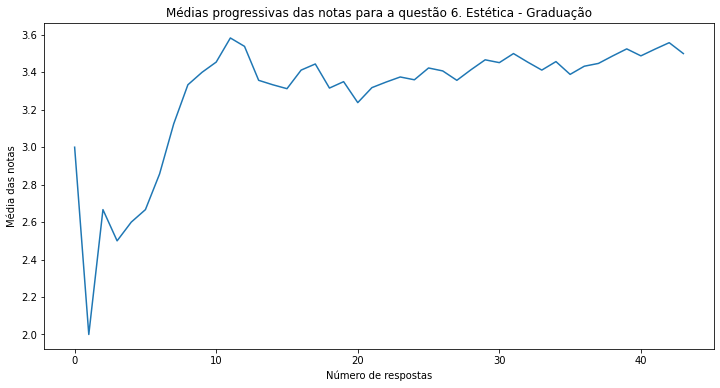

In [ ]:
temp = df[(df['Grau'] == tipos_grau[3])]['Estética'].sample(frac=1, random_state=101)
medias = [temp[:i].mean() for i in range(1, len(temp))]
plt.figure(figsize=(12,6))
plt.plot(medias)
plt.ylabel('Média das notas')
plt.xlabel('Número de respostas')
plt.title('Médias progressivas das notas para a questão 6. Estética - '+tipos_grau[3])
plt.show()

In [ ]:
campo_pesquisa = tipos_grau[0]
print(campo_pesquisa)
df_area_biologica = df[(df['Área'] == 'Biológicas') & (df['Grau'] == campo_pesquisa)].copy()
df_area_biologica['Área'].value_counts()

Mestrado


Biológicas    152
Name: Área, dtype: int64

In [ ]:
tabela_medias(df_area_biologica)

Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.167          3.891  ...          3.677               <0.001
Proeminentes     4.106          3.855  ...          3.217               <0.001
Eficiente        3.894          3.640  ...          3.378               <0.001
Útil             4.803          4.649  ...          4.736                0.215
Estética         4.288          4.069  ...          3.042               <0.001
Compreensão      4.061          3.807  ...          3.340               <0.001
Interesse        4.212          3.990  ...          2.935               <0.001

[7 rows x 7 columns]

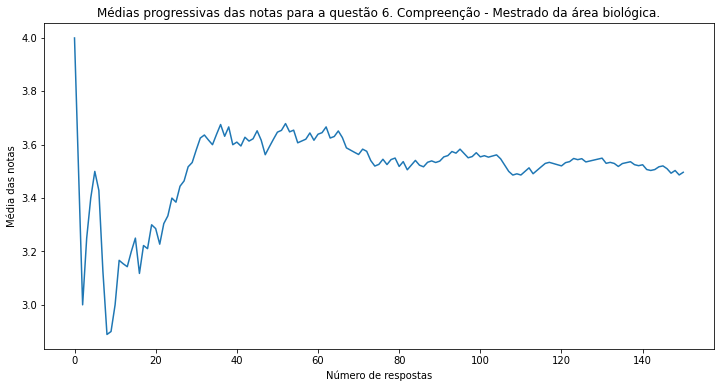

In [ ]:
temp = df[(df['Área'] == 'Biológicas') & (df['Grau'] == campo_pesquisa)]['Compreensão'].sample(frac=1, random_state=101)
medias = [temp[:i].mean() for i in range(1, len(temp))]
plt.figure(figsize=(12,6))
plt.plot(medias)
plt.ylabel('Média das notas')
plt.xlabel('Número de respostas')
plt.title('Médias progressivas das notas para a questão 6. Compreenção - '+campo_pesquisa+' da área biológica.')
plt.show()

In [ ]:
df_area_nao_biologica = df[(df['Área'] != 'Biológicas') & (df['Grau'] == campo_pesquisa)].copy()
df_area_nao_biologica['Área'].value_counts()

Humanas    21
Exatas     14
Name: Área, dtype: int64

In [ ]:
tabela_medias(df_area_nao_biologica)

Origem        Designer                 ...    Pesquisador Designer/Pesquisador
Valor            Média IC infer (95%)  ... IC super (95%)              p-value
Dintinguíveis    4.000          3.503  ...          4.309                0.608
Proeminentes     3.737          3.200  ...          3.740                0.221
Eficiente        3.737          3.200  ...          4.094                0.596
Útil             4.421          3.917  ...          5.033                0.619
Estética         4.263          3.793  ...          4.187               <0.001
Compreensão      3.684          3.103  ...          4.240                0.974
Interesse        3.947          3.418  ...          3.857                0.105

[7 rows x 7 columns]

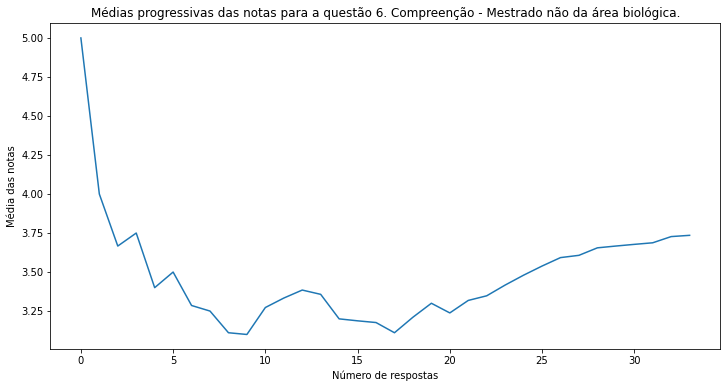

In [ ]:
temp = df[(df['Área'] != 'Biológicas') & (df['Grau'] == campo_pesquisa)]['Compreensão'].sample(frac=1, random_state=101)
medias = [temp[:i].mean() for i in range(1, len(temp))]
plt.figure(figsize=(12,6))
plt.plot(medias)
plt.ylabel('Média das notas')
plt.xlabel('Número de respostas')
plt.title('Médias progressivas das notas para a questão 6. Compreenção - '+campo_pesquisa+' não da área biológica.')
plt.show()